In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
movies=pd.read_csv("C:\Games\Bhag Milkha Bhag 2013 Hindi MC DVDScr Xvid AC3 IcTv\Desktop\CSV\my_movies.csv")



In [3]:
movies.head()

,V1,V2,V3,V4,V5,Sixth Sense,Gladiator,LOTR1,Harry Potter1,Patriot,LOTR2,Harry Potter2,LOTR,Braveheart,Green Mile
0,Sixth Sense,LOTR1,Harry Potter1,Green Mile,LOTR2,1,0,1,1,0,1,0,0,0,1
1,Gladiator,Patriot,Braveheart,NaN,NaN,0,1,0,0,1,0,0,0,1,0
2,LOTR1,LOTR2,NaN,NaN,NaN,0,0,1,0,0,1,0,0,0,0
3,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0
4,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0


In [4]:
movies=movies.iloc[:,5:]

In [5]:
movies.head()

,Sixth Sense,Gladiator,LOTR1,Harry Potter1,Patriot,LOTR2,Harry Potter2,LOTR,Braveheart,Green Mile
0,1,0,1,1,0,1,0,0,0,1
1,0,1,0,0,1,0,0,0,1,0
2,0,0,1,0,0,1,0,0,0,0
3,1,1,0,0,1,0,0,0,0,0
4,1,1,0,0,1,0,0,0,0,0


In [6]:
from mlxtend.frequent_patterns import apriori,association_rules
frequent_itemsets=apriori(movies,min_support=0.05,use_colnames=True,max_len=3)
frequent_itemsets.sort_values('support',ascending=False,inplace=True)

<ipython-input-7-7ba9e43929ab>:1: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.
  plt.bar(x = list(range(1,11)),height = frequent_itemsets.support[1:11],color='rgmyk');plt.xticks(list(range(1,11)),frequent_itemsets.itemsets[1:11])


Text(0, 0.5, 'support')

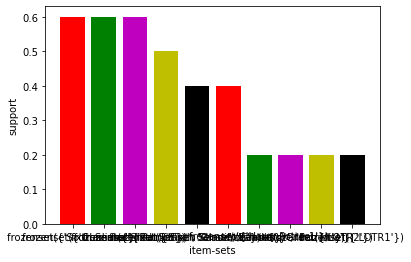

In [7]:
plt.bar(x = list(range(1,11)),height = frequent_itemsets.support[1:11],color='rgmyk');plt.xticks(list(range(1,11)),frequent_itemsets.itemsets[1:11])
plt.xlabel('item-sets');plt.ylabel('support')

In [8]:
rules=association_rules(frequent_itemsets,metric='confidence',min_threshold=1)

In [9]:
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Patriot),(Gladiator),0.6,0.7,0.6,1.0,1.428571,0.18,inf
1,"(Sixth Sense, Patriot)",(Gladiator),0.4,0.7,0.4,1.0,1.428571,0.12,inf
2,(LOTR2),(LOTR1),0.2,0.2,0.2,1.0,5.000000,0.16,inf
3,(LOTR1),(LOTR2),0.2,0.2,0.2,1.0,5.000000,0.16,inf
4,(Green Mile),(Sixth Sense),0.2,0.6,0.2,1.0,1.666667,0.08,inf
5,"(Sixth Sense, LOTR2)",(Harry Potter1),0.1,0.2,0.1,1.0,5.000000,0.08,inf
6,"(Sixth Sense, Harry Potter1)",(LOTR2),0.1,0.2,0.1,1.0,5.000000,0.08,inf
7,"(Harry Potter1, LOTR2)",(Sixth Sense),0.1,0.6,0.1,1.0,1.666667,0.04,inf
8,"(Sixth Sense, LOTR)",(Gladiator),0.1,0.7,0.1,1.0,1.428571,0.03,inf
9,"(LOTR, Gladiator)",(Sixth Sense),0.1,0.6,0.1,1.0,1.666667,0.04,inf


In [10]:
rules=association_rules(frequent_itemsets,metric='lift',min_threshold=1)

In [11]:
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Gladiator),(Patriot),0.7,0.6,0.6,0.857143,1.428571,0.18,2.8
1,(Patriot),(Gladiator),0.6,0.7,0.6,1.000000,1.428571,0.18,inf
2,(Sixth Sense),(Gladiator),0.6,0.7,0.5,0.833333,1.190476,0.08,1.8
3,(Gladiator),(Sixth Sense),0.7,0.6,0.5,0.714286,1.190476,0.08,1.4
4,(Sixth Sense),(Patriot),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2
...,...,...,...,...,...,...,...,...,...
119,"(Harry Potter1, Green Mile)",(LOTR2),0.1,0.2,0.1,1.000000,5.000000,0.08,inf
120,"(LOTR2, Green Mile)",(Harry Potter1),0.1,0.2,0.1,1.000000,5.000000,0.08,inf
121,(Harry Potter1),"(LOTR2, Green Mile)",0.2,0.1,0.1,0.500000,5.000000,0.08,1.8
122,(LOTR2),"(Harry Potter1, Green Mile)",0.2,0.1,0.1,0.500000,5.000000,0.08,1.8


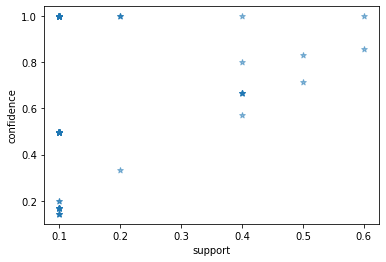

In [12]:
plt.scatter(rules.support,rules.confidence,   alpha=0.5, marker="*")
plt.xlabel('support')
plt.ylabel('confidence') 
plt.show()